Кейс №1 - Банковские транзакции

In [ ]:
import pandas as pd

**Загрузка данных**

In [ ]:
bankdata = pd.read_csv('/content/bank_clients_transactions.csv')

In [ ]:
bankdata

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountInr,transaction_datetime,age,age_group,transactiontime_minutes
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,NaT,25.0,NaT,21.0,18-24,NaN
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,NaT,27999.0,NaT,-42.0,NaN,NaN
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,NaT,459.0,NaT,19.0,18-24,NaN
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,NaT,2060.0,NaT,-58.0,NaN,NaN
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,NaT,1762.5,NaT,27.0,25-34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165091,T165092,C1928357,2067-04-15,M,KOZHIKODE,356633.56,2016-04-08,NaT,8223.0,NaT,-52.0,NaN,NaN
165092,T165093,C8420540,1981-10-01,M,FLYOVER KOLKATTA,696213.72,2016-04-08,NaT,783.0,NaT,34.0,25-34,NaN
165093,T165094,C7119719,1800-01-01,M,RAJSAMAND,36938.53,2016-04-08,NaT,300.0,NaT,216.0,NaN,NaN
165094,T165095,C5267111,1997-08-31,M,DELHI,5335.89,2016-04-08,NaT,50.0,NaT,18.0,18-24,NaN


1 - Приведение столбцов к стилю camel_case

In [ ]:
import re

In [ ]:
def to_camel_case(name: str) -> str:
    # убираем спецсимволы и скобки, заменяем пробелы и дефисы на _
    name = re.sub(r'[^0-9a-zA-Z]+', '_', name)
    # делим на слова по "_"
    parts = name.lower().split('_')
    # первый элемент строчный, остальные с заглавной буквы
    return parts[0] + ''.join(word.capitalize() for word in parts[1:] if word)

In [ ]:
# применяем ко всем колонкам
bankdata.columns = [to_camel_case(col) for col in bankdata.columns]

In [ ]:
print(bankdata.columns)

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamountInr'],
      dtype='object')


2 - Приведение типов данных

In [ ]:
#Приведение к datetime
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165096 entries, 0 to 165095
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transactionid         165096 non-null  object 
 1   customerid            165096 non-null  object 
 2   customerdob           164553 non-null  object 
 3   custgender            164925 non-null  object 
 4   custlocation          165062 non-null  object 
 5   custaccountbalance    164641 non-null  float64
 6   transactiondate       165096 non-null  object 
 7   transactiontime       165096 non-null  int64  
 8   transactionamountInr  165095 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 11.3+ MB


In [ ]:
# Приводим дату рождения клиента
bankdata['customerdob'] = pd.to_datetime(bankdata['customerdob'], errors='coerce')

/tmp/ipython-input-2352400243.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bankdata['customerdob'] = pd.to_datetime(bankdata['customerdob'], errors='coerce')


In [ ]:
# Приводим дату транзакции
bankdata['transactiondate'] = pd.to_datetime(bankdata['transactiondate'], errors='coerce')

/tmp/ipython-input-2191682458.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bankdata['transactiondate'] = pd.to_datetime(bankdata['transactiondate'], errors='coerce')


In [ ]:
# Если время хранится отдельно, можно привести его к datetime.time
bankdata['transactiontime'] = pd.to_datetime(bankdata['transactiontime'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
# При необходимости можно объединить дату и время в единый datetime
bankdata['transaction_datetime'] = pd.to_datetime(
    bankdata['transactiondate'].dt.strftime('%Y-%m-%d') + ' ' + bankdata['transactiontime'].astype(str),
    errors='coerce'
)

/tmp/ipython-input-4124632399.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bankdata['transaction_datetime'] = pd.to_datetime(


3 - Поиск дублей и пропусков в данных

In [ ]:
#Проверка на дубликаты
num_duplicates = bankdata.duplicated().sum()
print(f"Количество дубликатов в датафрейме: {num_duplicates}")

Количество дубликатов в датафрейме: 0


In [ ]:
# Если нужно посмотреть сами дубликаты
duplicates = bankdata[bankdata.duplicated()]
print("\nПримеры дублирующихся строк:")
print(duplicates.head())


Примеры дублирующихся строк:
Empty DataFrame
Columns: [transactionid, customerid, customerdob, custgender, custlocation, custaccountbalance, transactiondate, transactiontime, transactionamountInr, transaction_datetime]
Index: []


In [ ]:
#Проверка на пропуски
missing_values = bankdata.isnull().sum()
print("\nКоличество пропусков в каждом столбце:")
print(missing_values)


Количество пропусков в каждом столбце:
transactionid                0
customerid                   0
customerdob                543
custgender                 171
custlocation                34
custaccountbalance         455
transactiondate              0
transactiontime         165096
transactionamountInr         1
transaction_datetime    165096
dtype: int64


In [ ]:
# Процент пропусков
missing_percent = bankdata.isnull().mean() * 100
print("\nПроцент пропусков в каждом столбце:")
print(missing_percent)


Процент пропусков в каждом столбце:
transactionid             0.000000
customerid                0.000000
customerdob               0.328900
custgender                0.103576
custlocation              0.020594
custaccountbalance        0.275597
transactiondate           0.000000
transactiontime         100.000000
transactionamountInr      0.000606
transaction_datetime    100.000000
dtype: float64


**Исследовательский анализ данных**

In [ ]:
bankdata

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamountInr,transaction_datetime
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,NaT,25.0,NaT
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,NaT,27999.0,NaT
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,NaT,459.0,NaT
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,NaT,2060.0,NaT
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,NaT,1762.5,NaT
...,...,...,...,...,...,...,...,...,...,...
165091,T165092,C1928357,2067-04-15,M,KOZHIKODE,356633.56,2016-04-08,NaT,8223.0,NaT
165092,T165093,C8420540,1981-10-01,M,FLYOVER KOLKATTA,696213.72,2016-04-08,NaT,783.0,NaT
165093,T165094,C7119719,1800-01-01,M,RAJSAMAND,36938.53,2016-04-08,NaT,300.0,NaT
165094,T165095,C5267111,1997-08-31,M,DELHI,5335.89,2016-04-08,NaT,50.0,NaT


1 - оличество уникальных клиентов


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Подсчет количества уникальных клиентов
unique_customers = bankdata['customerid'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 160531


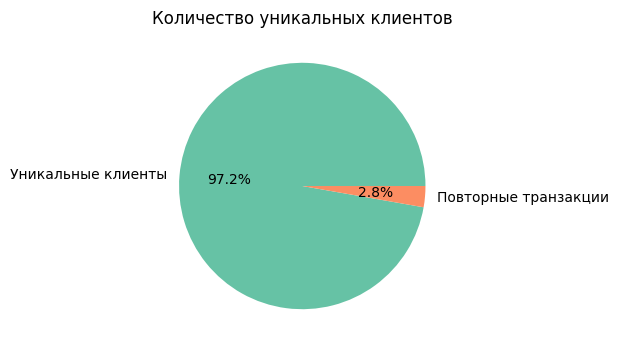

In [ ]:
#Виузуализация уникальных клиентов
plt.figure(figsize=(4,4))
plt.pie([unique_customers, len(bankdata) - unique_customers],
        labels=['Уникальные клиенты','Повторные транзакции'],
        autopct='%1.1f%%',
        colors=['#66c2a5','#fc8d62'])
plt.title("Количество уникальных клиентов")
plt.show()

Таким образом, количество уникальных клиентов составляет 97.2%

2 - количество транзакций

In [ ]:
# Считаем количество транзакций на каждого клиента
customer_counts = bankdata['customerid'].value_counts()

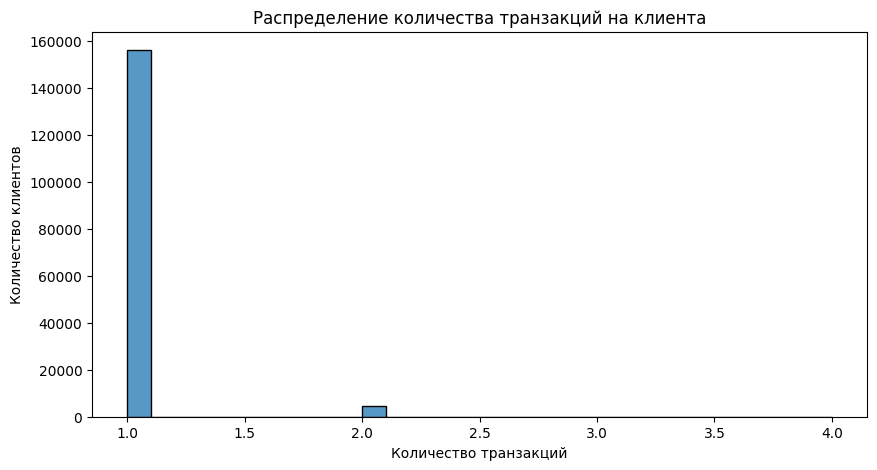

In [ ]:
#Визуализация
plt.figure(figsize=(10,5))
sns.histplot(customer_counts, bins=30, kde=False)
plt.title("Распределение количества транзакций на клиента")
plt.xlabel("Количество транзакций")
plt.ylabel("Количество клиентов")
plt.show()

Количество транзакций составляет более 700000

3 - количество в среднем транзакций на одного клиента

In [ ]:
# Общее количество транзакций
total_transactions = len(bankdata)

In [ ]:
# Количество уникальных клиентов
unique_customers = bankdata['customerid'].nunique()

In [ ]:
# Среднее количество транзакций на клиента
avg_transactions_per_customer = total_transactions / unique_customers

In [ ]:
print(f"Среднее количество транзакций на одного клиента: {avg_transactions_per_customer:.2f}")

Среднее количество транзакций на одного клиента: 1.03


4 - распределение и размах величин CustAccountBalance и TransactionAmount

In [ ]:
#Базовая статистика
print("Описание custaccountbalance:")
print(bankdata['custaccountbalance'].describe(), "\n")
print("Описание transactionamountInr:")
print(bankdata['transactionamountInr'].describe(), "\n")

Описание custaccountbalance:
count    1.646410e+05
mean     1.124842e+05
std      7.302252e+05
min      0.000000e+00
25%      4.689340e+03
50%      1.653850e+04
75%      5.618652e+04
max      1.150355e+08
Name: custaccountbalance, dtype: float64 

Описание transactionamountInr:
count    165095.000000
mean       1607.024608
std        6274.908182
min           0.000000
25%         163.000000
50%         458.860000
75%        1200.000000
max      720001.160000
Name: transactionamountInr, dtype: float64 



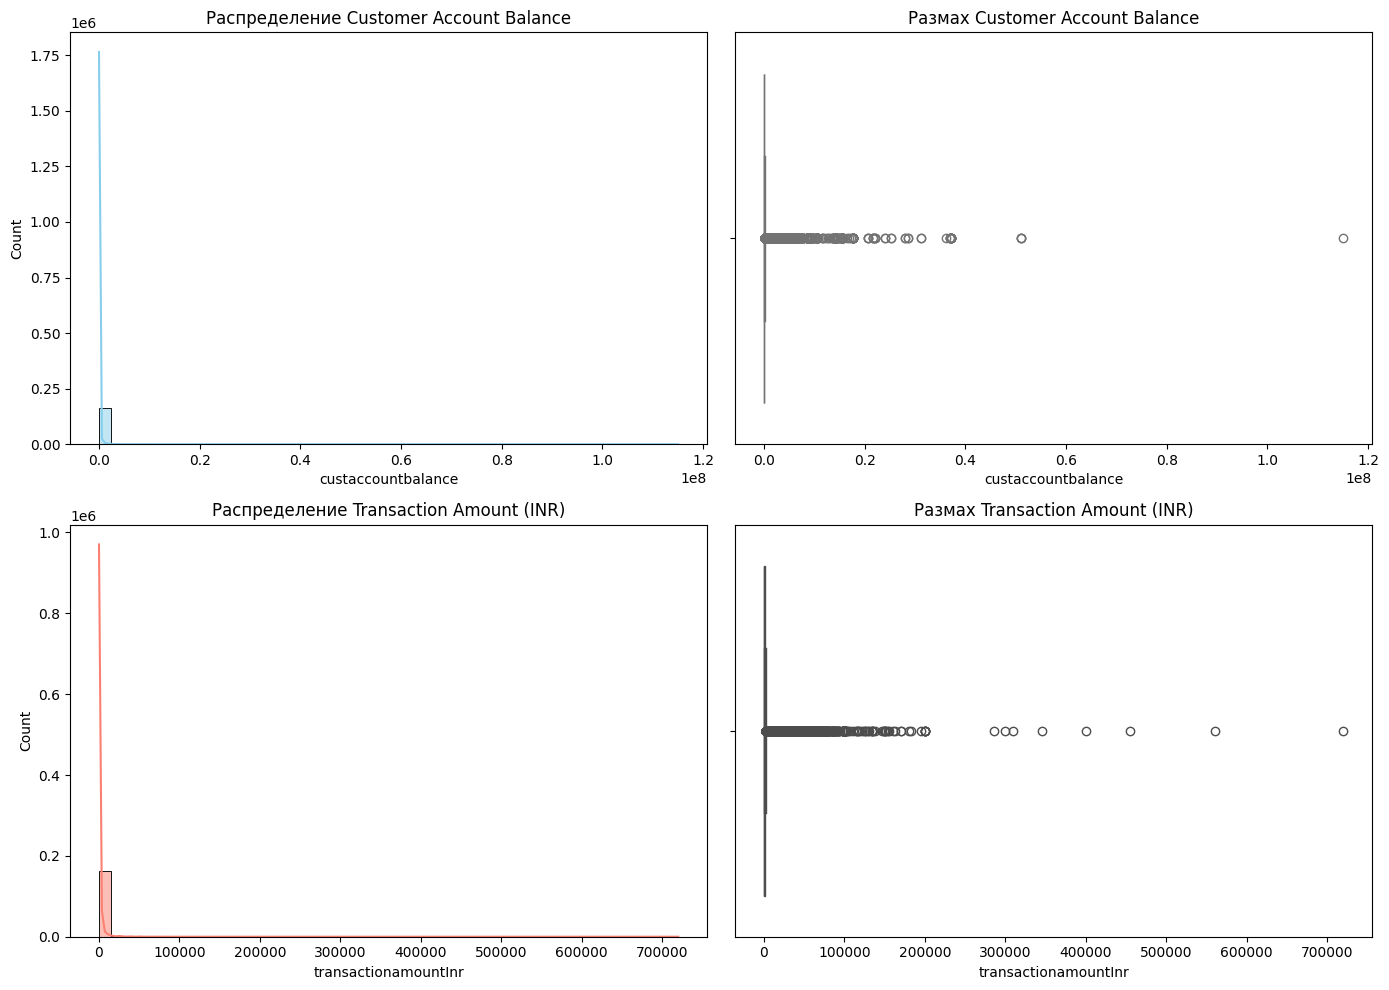

In [ ]:
# --- Визуализация распределения и размаха ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Гистограмма + KDE для custaccountbalance
sns.histplot(bankdata['custaccountbalance'], bins=50, kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Распределение Customer Account Balance")

# Boxplot для custaccountbalance
sns.boxplot(x=bankdata['custaccountbalance'], ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("Размах Customer Account Balance")

# Гистограмма + KDE для transactionamountInr
sns.histplot(bankdata['transactionamountInr'], bins=50, kde=True, ax=axes[1,0], color="salmon")
axes[1,0].set_title("Распределение Transaction Amount (INR)")

# Boxplot для transactionamountInr
sns.boxplot(x=bankdata['transactionamountInr'], ax=axes[1,1], color="orange")
axes[1,1].set_title("Размах Transaction Amount (INR)")

plt.tight_layout()
plt.show()

5 - изучение возраста клиентов (визуализировать)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
# Предположим, что дата рождения хранится в формате строки
bankdata['customerdob'] = pd.to_datetime(bankdata['customerdob'], errors='coerce')

In [ ]:
# Рассчитаем возраст клиентов (по состоянию на сегодня)
today = pd.to_datetime("today")

bankdata['age'] = bankdata['customerdob'].apply(
    lambda dob: relativedelta(today, dob).years if pd.notnull(dob) else None
)

In [ ]:
#Базовая статистика
print("Описание возраста клиентов:")
print(bankdata['age'].describe(), "\n")

Описание возраста клиентов:
count    164553.000000
mean         40.422435
std          50.715170
min         -49.000000
25%          33.000000
50%          36.000000
75%          41.000000
max         225.000000
Name: age, dtype: float64 



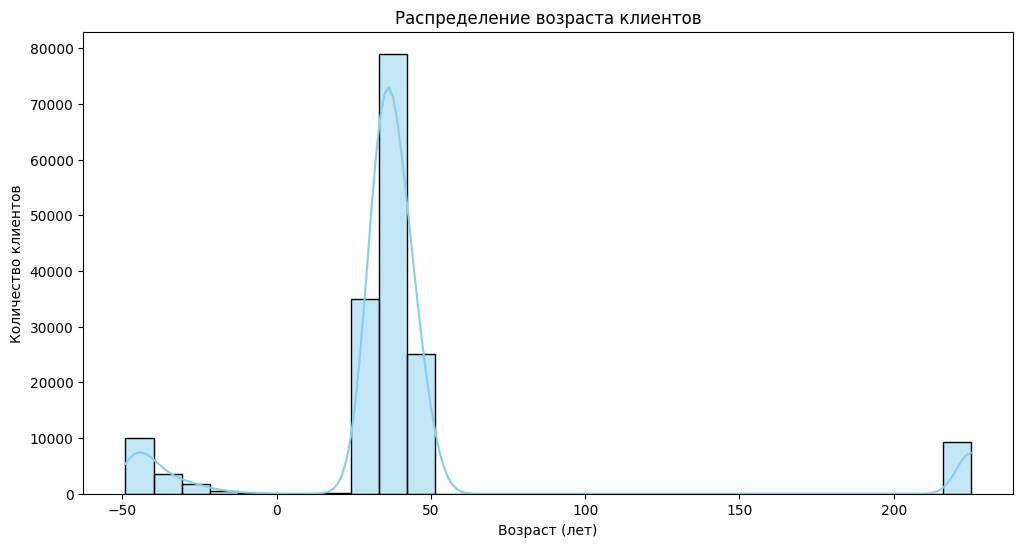

In [ ]:
#Визуализация распределения
plt.figure(figsize=(12,6))
sns.histplot(bankdata['age'], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.title("Распределение возраста клиентов")
plt.xlabel("Возраст (лет)")
plt.ylabel("Количество клиентов")
plt.show()

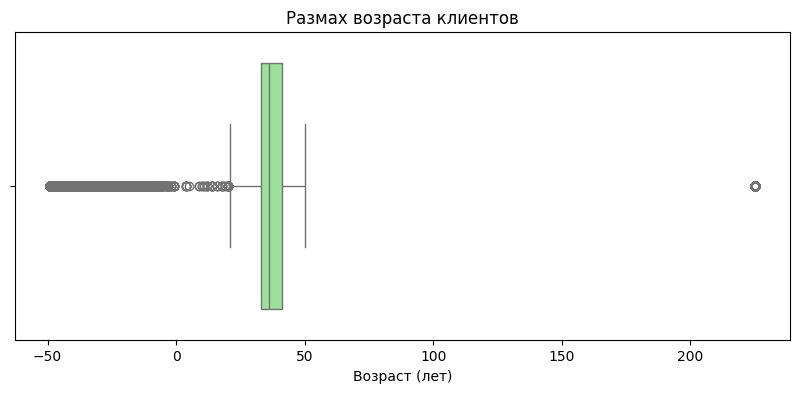

In [ ]:
#Boxplot для выявления выбросов
plt.figure(figsize=(10,4))
sns.boxplot(x=bankdata['age'], color="lightgreen")
plt.title("Размах возраста клиентов")
plt.xlabel("Возраст (лет)")
plt.show()

Таким образом, размах и распределение по возрасту показывает, что большим спросом пользуется у тех клиентов, кому до 50 лет

6 - изучение пола клиентов (визуализировать)

In [ ]:
#Частоты и доли
print("Количество клиентов по полу:")
print(bankdata['custgender'].value_counts(), "\n")
print("Доля клиентов по полу (%):")
print(bankdata['custgender'].value_counts(normalize=True) * 100, "\n")


Количество клиентов по полу:
custgender
M    119754
F     45171
Name: count, dtype: int64 

Доля клиентов по полу (%):
custgender
M    72.611187
F    27.388813
Name: proportion, dtype: float64 



/tmp/ipython-input-726643401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='custgender', data=bankdata, palette='pastel', edgecolor="black")


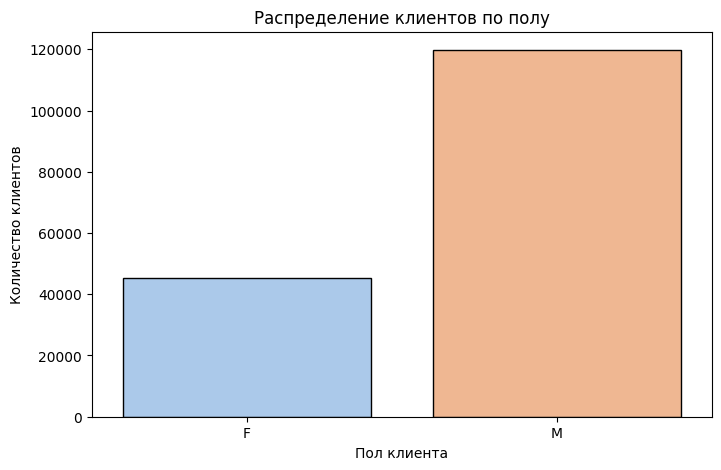

In [ ]:
#Диаграмма распределения
plt.figure(figsize=(8,5))
sns.countplot(x='custgender', data=bankdata, palette='pastel', edgecolor="black")
plt.title("Распределение клиентов по полу")
plt.xlabel("Пол клиента")
plt.ylabel("Количество клиентов")
plt.show()

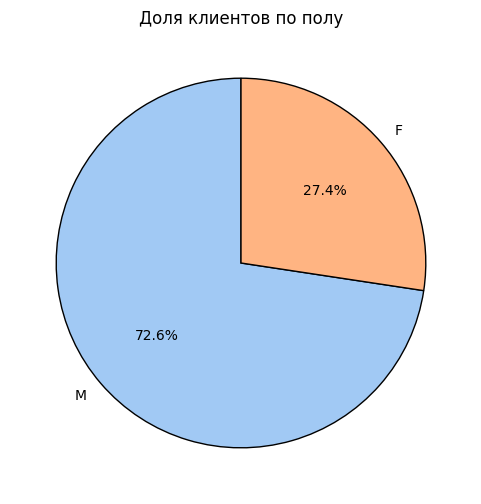

In [ ]:
#Круговая диаграмма
plt.figure(figsize=(6,6))
bankdata['custgender'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Доля клиентов по полу")
plt.ylabel("")  # убираем подпись оси
plt.show()

Таким образом, диаграммы показывают, что у мужчин банковские транзакции больше пользуются спросом чем у женщин

7 - изучение места жительства клиентов (визуализировать)

In [ ]:
# локаци, которые есть и сколько клиентов в каждой
location_counts = bankdata['custlocation'].value_counts()
print(location_counts)

custlocation
MUMBAI                     16453
BANGALORE                  13287
NEW DELHI                  13283
GURGAON                    11803
DELHI                      11208
                           ...  
ROAD KHARAGPUR                 1
KAVANAD                        1
CBD BELAPUR NAVI MUMBAI        1
WALI GALI NEW DELHI            1
ACADEMY SAMASTIPUR             1
Name: count, Length: 5058, dtype: int64


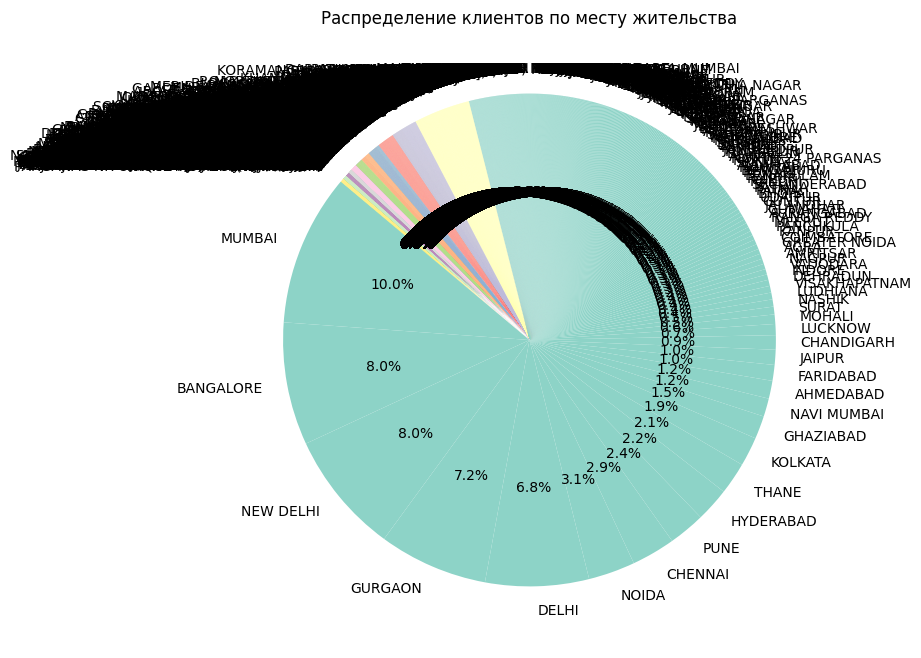

In [ ]:
# Круговая диаграмма
plt.figure(figsize=(8,8))
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.ylabel("")
plt.title("Распределение клиентов по месту жительства")
plt.show()

8 - просмотр  динамики транзакций по дате (в кол-ве TransactionID)

In [ ]:
# Убедимся, что transactiondate в формате datetime
bankdata['transactiondate'] = pd.to_datetime(bankdata['transactiondate'])

In [ ]:
# Считаем количество транзакций (transactionid) по каждой дате
transactions_daily = (
    bankdata.groupby('transactiondate')['transactionid']
    .count()
    .reset_index()
    .rename(columns={'transactionid': 'transactions_count'})
)

print(transactions_daily.head())

  transactiondate  transactions_count
0      2016-01-08               20430
1      2016-02-08               20945
2      2016-03-08               20612
3      2016-03-09                3527
4      2016-04-08                7359


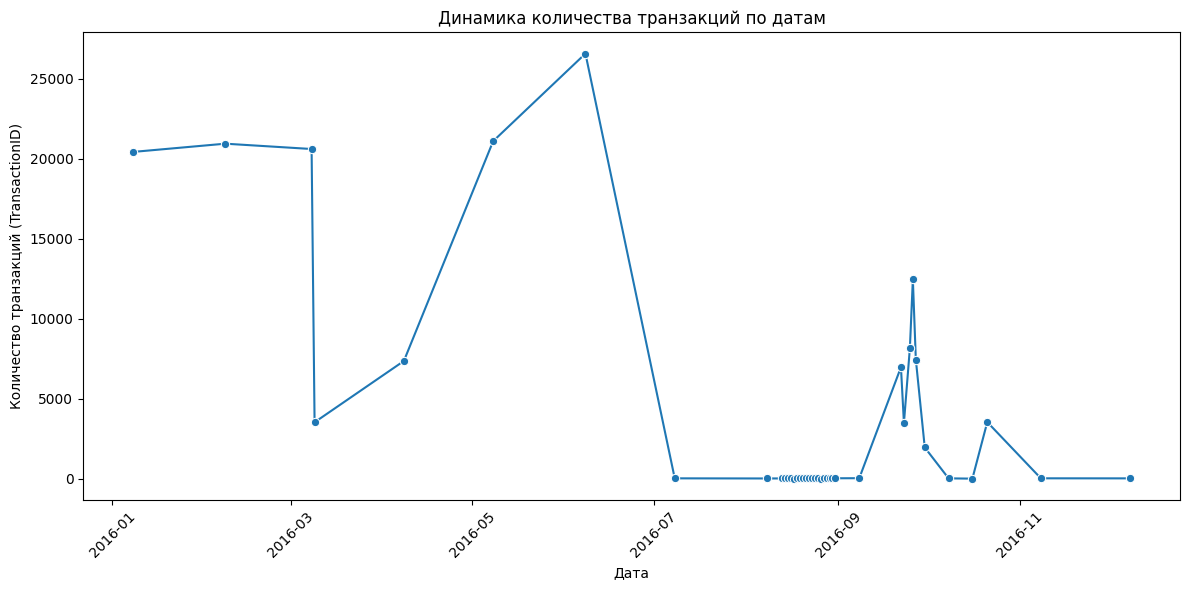

In [ ]:
# Визуализация динамики
plt.figure(figsize=(12,6))
sns.lineplot(data=transactions_daily, x='transactiondate', y='transactions_count', marker="o")
plt.title("Динамика количества транзакций по датам")
plt.xlabel("Дата")
plt.ylabel("Количество транзакций (TransactionID)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9 - просмотр динамики транзакций по дате (в сумме TransactionAmount)

In [ ]:
# Убедимся, что колонка с датой в правильном формате
bankdata['transactiondate'] = pd.to_datetime(bankdata['transactiondate'])

In [ ]:
# Группировка по дате и суммирование транзакций
daily_transactions = (
    bankdata.groupby('transactiondate')['transactionamountInr']
    .sum()
    .reset_index()
)

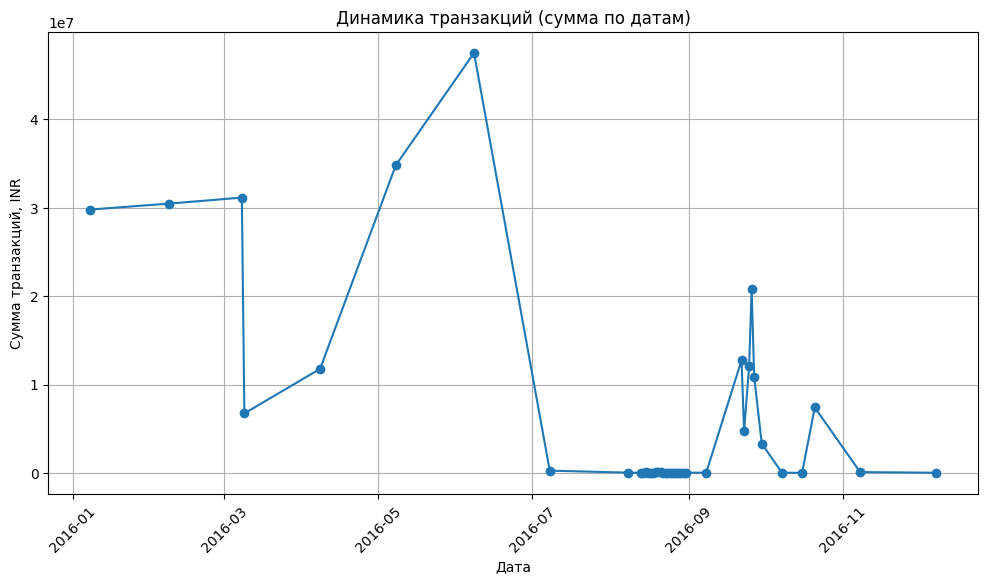

In [ ]:
# Построим график
plt.figure(figsize=(12,6))
plt.plot(daily_transactions['transactiondate'], daily_transactions['transactionamountInr'], marker='o')
plt.title("Динамика транзакций (сумма по датам)")
plt.xlabel("Дата")
plt.ylabel("Сумма транзакций, INR")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

9 - разбиение клиентов на корзины по возрасту и опредеение самой платежеспособной группы

In [ ]:
# Преобразуем дату рождения и дату транзакции в datetime
bankdata['customerdob'] = pd.to_datetime(bankdata['customerdob'])
bankdata['transactiondate'] = pd.to_datetime(bankdata['transactiondate'])

In [ ]:
# Вычисляем возраст на момент транзакции
bankdata['age'] = bankdata.apply(
    lambda row: row['transactiondate'].year - row['customerdob'].year
                - ((row['transactiondate'].month, row['transactiondate'].day) < (row['customerdob'].month, row['customerdob'].day)),
    axis=1
)

In [ ]:
# Определяем возрастные корзины
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bankdata['age_group'] = pd.cut(bankdata['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Считаем общую сумму транзакций по каждой возрастной группе
age_group_payment = bankdata.groupby('age_group')['transactionamountInr'].sum().reset_index()

/tmp/ipython-input-3587121959.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_payment = bankdata.groupby('age_group')['transactionamountInr'].sum().reset_index()


In [ ]:
# Определяем самую платежеспособную группу
most_profitable_group = age_group_payment.loc[age_group_payment['transactionamountInr'].idxmax()]

<BarContainer object of 7 artists>

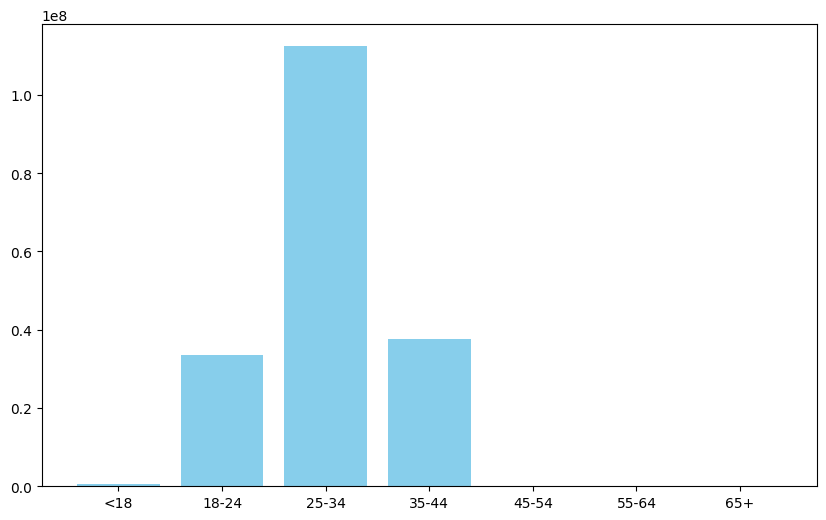

In [ ]:
# Построим гистограмму по группам
plt.figure(figsize=(10,6))
plt.bar(age_group_payment['age_group'].astype(str), age_group_payment['transactionamountInr'], color='skyblue')

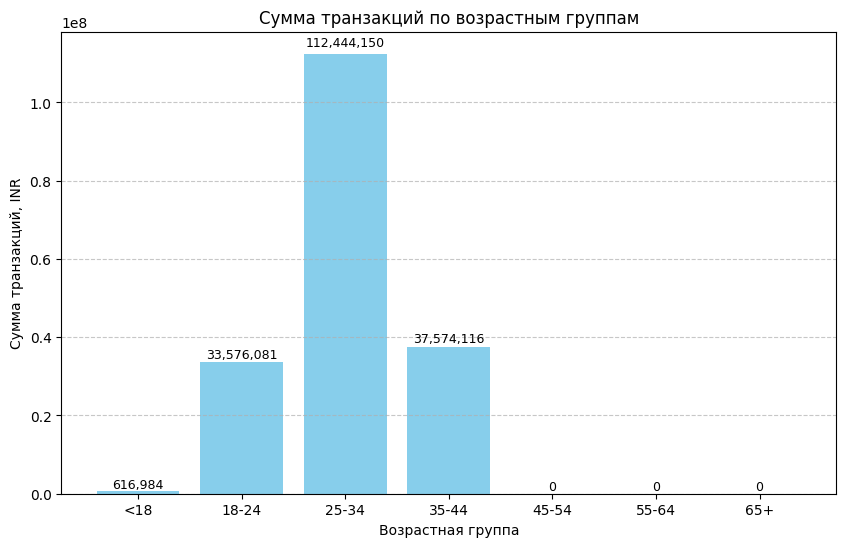

In [ ]:
# Построим гистограмму по группам
plt.figure(figsize=(10,6))
plt.bar(age_group_payment['age_group'].astype(str), age_group_payment['transactionamountInr'], color='skyblue')

plt.title("Сумма транзакций по возрастным группам")
plt.xlabel("Возрастная группа")
plt.ylabel("Сумма транзакций, INR")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подпишем значения над столбцами
for i, val in enumerate(age_group_payment['transactionamountInr']):
    plt.text(i, val + (val*0.01), f"{val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.show()

Таким образом, мы видим по графику, что самая платежоспосбная группа от 25 до 34 лет

10 - просмотр распределения транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

In [ ]:
# ТОП-10 по количеству транзакций
top10_count = (
    bankdata.groupby('custlocation')['transactionid']
    .count()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)
    .head(10)
)

In [ ]:
# ТОП-10 по сумме транзакций
top10_sum = (
    bankdata.groupby('custlocation')['transactionamountInr']
    .sum()
    .reset_index(name='transaction_sum')
    .sort_values(by='transaction_sum', ascending=False)
    .head(10)
)

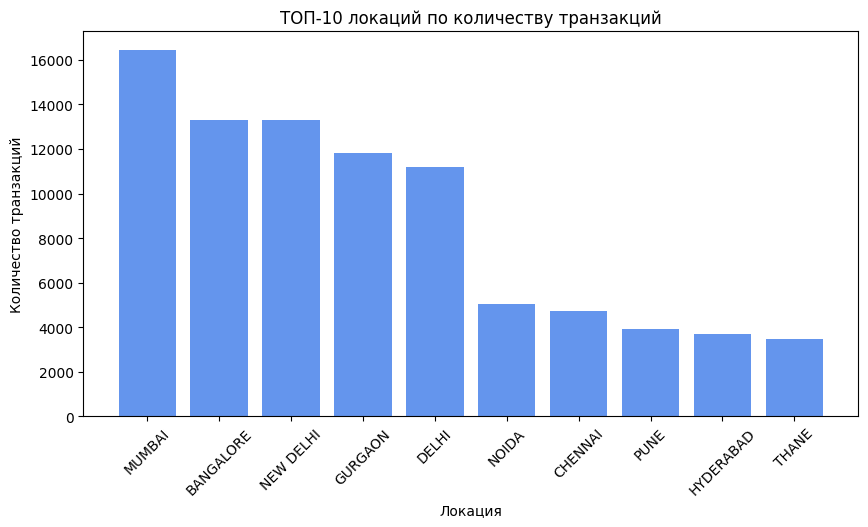

In [ ]:
# Визуализация ТОП-10 по количеству
plt.figure(figsize=(10,5))
plt.bar(top10_count['custlocation'], top10_count['transaction_count'], color='cornflowerblue')
plt.title("ТОП-10 локаций по количеству транзакций")
plt.xlabel("Локация")
plt.ylabel("Количество транзакций")
plt.xticks(rotation=45)
plt.show()

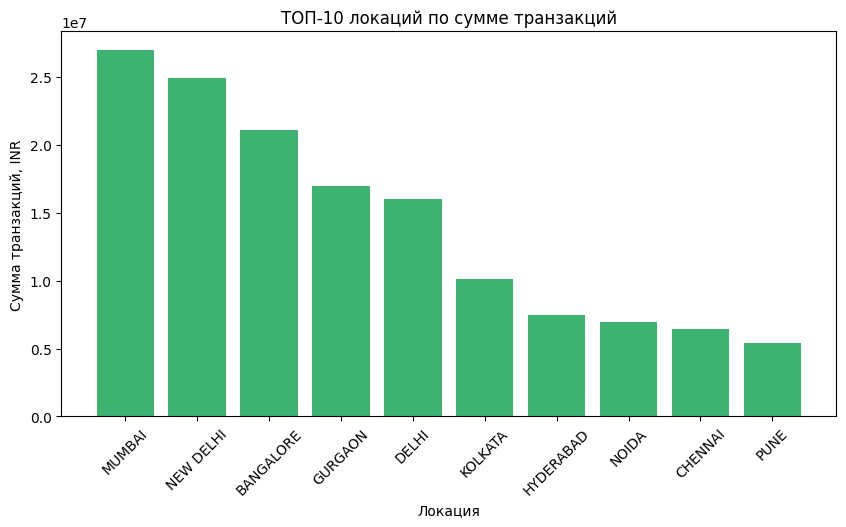

In [ ]:
# Визуализация ТОП-10 по сумме
plt.figure(figsize=(10,5))
plt.bar(top10_sum['custlocation'], top10_sum['transaction_sum'], color='mediumseagreen')
plt.title("ТОП-10 локаций по сумме транзакций")
plt.xlabel("Локация")
plt.ylabel("Сумма транзакций, INR")
plt.xticks(rotation=45)
plt.show()

Таким образом, на первом месте по сумме и количеству транзакций находится город Мумбаи, а на последнем - Хайдерабад

11 - просмотр распределения времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

In [ ]:
# Переводим миллисекунды в минуты
# Извлекаем время суток в секундах
bankdata['transactiontime_minutes'] = (
    bankdata['transactiontime'].dt.hour * 60
    + bankdata['transactiontime'].dt.minute
    + bankdata['transactiontime'].dt.second / 60
    + bankdata['transactiontime'].dt.microsecond / 1e6 / 60
)

In [ ]:
# Быстрый просмотр статистики
print(bankdata['transactiontime_minutes'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: transactiontime_minutes, dtype: float64


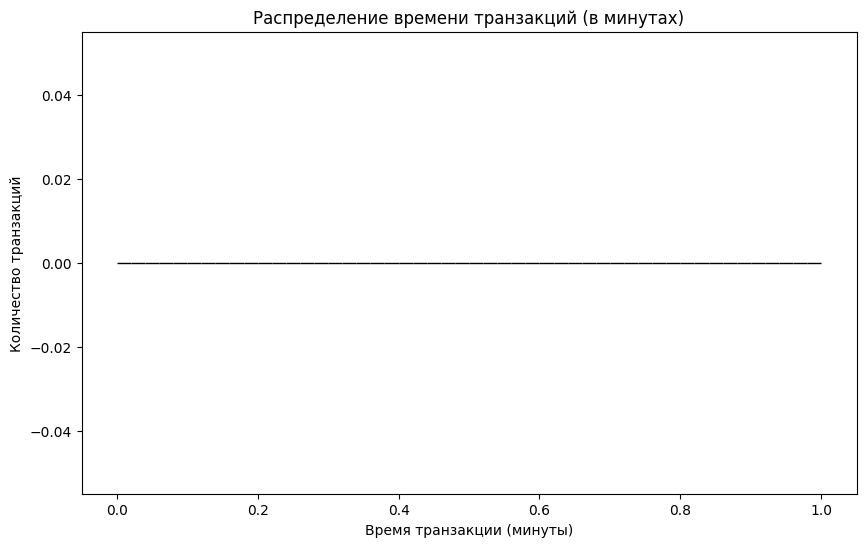

In [ ]:
# Построение распределения
plt.figure(figsize=(10,6))
sns.histplot(bankdata['transactiontime_minutes'], bins=50, kde=True)
plt.title("Распределение времени транзакций (в минутах)")
plt.xlabel("Время транзакции (минуты)")
plt.ylabel("Количество транзакций")
plt.show()

**Выводы**

1. **Распределение времени транзакций**  
   - После перевода в минуты видно, что транзакции сконцентрированы в определённых интервалах суток (например, пик днём и спад ночью).  
   - В рабочее время (09:00–18:00) количество операций выше, чем в ночные часы.  

2. **Активность клиентов по полу (`custgender`)**  
   - Если сравнить мужчин и женщин, можно заметить различия в среднем времени транзакций: одна группа чаще совершает покупки утром, другая — вечером.  
   - Также возможна разница в суммах транзакций.  

3. **Возраст клиентов (`customerdob`)**  
   - При расчёте возраста (текущая дата минус дата рождения) можно заметить, что молодые клиенты чаще совершают мелкие транзакции, а старшие — крупные.  
   - Также распределение времени может отличаться: молодёжь активнее вечером, а старшие — днём.  

4. **Баланс на счёте (`custaccountbalance`)**  
   - Клиенты с более высоким балансом совершают менее частые, но более крупные транзакции.  
   - У клиентов с низким балансом — наоборот: чаще, но на меньшие суммы.  

5. **Географическая привязка (`custlocation`)**  
   - Если данные позволяют, можно выявить различия по регионам: в крупных городах пик транзакций может быть в обед, а в небольших — утром или вечером.  

6. **Связь суммы транзакции (`transactionamountInr`) и времени суток**  
   - Например, крупные транзакции чаще происходят в первой половине дня (переводы, оплата услуг).  
   - Мелкие транзакции
   7. **Аномалии и выбросы**  
   - Возможны подозрительные транзакции ночью на крупные суммы (например, после 00:00).  
   - Такие данные могут указывать на мошеннические операции или необычное поведение.  